# Import Libraries

In [1]:
# Week 6 — Cell 1: Importing Libraries (Random Forest - Customer Churn)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style="whitegrid", context="notebook")

print("Libraries imported successfully!")




Libraries imported successfully!


# Load Dataset

In [2]:
# Week 6 — Cell 2: Load Telco Customer Churn dataset

DATA_PATH = r"D:\AD_Lab\datasets\telco_customer\WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(DATA_PATH)

print("Dataset loaded successfully!")
print("\nShape:", df.shape)

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())


Dataset loaded successfully!

Shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

# Basic Cleaning

In [3]:
# Week 6 — Cell 3: Inspect target variable & basic cleaning

# Inspect target distribution
print("Churn value counts:")
print(df['Churn'].value_counts())

print("\nChurn value counts (percentage):")
print(df['Churn'].value_counts(normalize=True) * 100)

# Check TotalCharges datatype
print("\nTotalCharges dtype before cleaning:", df['TotalCharges'].dtype)

# Convert TotalCharges to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values after conversion
print("\nMissing values after conversion:")
print(df.isna().sum())

# Drop rows with missing TotalCharges (very few rows)
df = df.dropna(subset=['TotalCharges'])

print("\nShape after cleaning:", df.shape)
print("TotalCharges dtype after cleaning:", df['TotalCharges'].dtype)


Churn value counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn value counts (percentage):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

TotalCharges dtype before cleaning: object

Missing values after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Shape after cleaning: (7032, 21)
TotalCharges dtype after cleaning: float64


# Encode Categorical Values

In [4]:
# Week 6 — Cell 4: Encode categorical variables

# Convert target variable 'Churn' to binary
# Yes -> 1 (Churned), No -> 0 (Retained)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("Target encoding check:")
print(df['Churn'].value_counts())

# Drop customerID (identifier, not useful for prediction)
df = df.drop(columns=['customerID'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

print("\nShape after encoding:", df_encoded.shape)
print("\nEncoded dataset preview:")
display(df_encoded.head())


Target encoding check:
Churn
0    5163
1    1869
Name: count, dtype: int64

Shape after encoding: (7032, 31)

Encoded dataset preview:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# Split Features and Target

In [5]:
# Week 6 — Cell 5: Split features and target

# Separate features and target
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

print("\nTarget distribution:")
print(y.value_counts())


Features shape: (7032, 30)
Target shape: (7032,)

Target distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64


# Train Test Split

In [6]:
# Week 6 — Cell 6: Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Training set shape:")
print(" X_train:", X_train.shape)
print(" y_train:", y_train.shape)

print("\nTesting set shape:")
print(" X_test :", X_test.shape)
print(" y_test :", y_test.shape)


Training set shape:
 X_train: (5274, 30)
 y_train: (5274,)

Testing set shape:
 X_test : (1758, 30)
 y_test : (1758,)


# Train Random Forest Classifier

In [7]:
# Week 6 — Cell 7: Train Random Forest classifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


# Predictions

In [8]:
# Week 6 — Cell 8: Predictions

# Predict churn on test data
y_pred = rf_model.predict(X_test)

print("Predictions generated successfully!")
print("First 10 predictions:", y_pred[:10])


Predictions generated successfully!
First 10 predictions: [1 0 0 1 0 0 0 0 1 0]


# Accuracy

In [9]:
# Week 6 — Cell 9: Accuracy score

accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")


Random Forest Accuracy: 79.01%


# Confusion Matrix

Confusion Matrix:
[[1156  135]
 [ 234  233]]


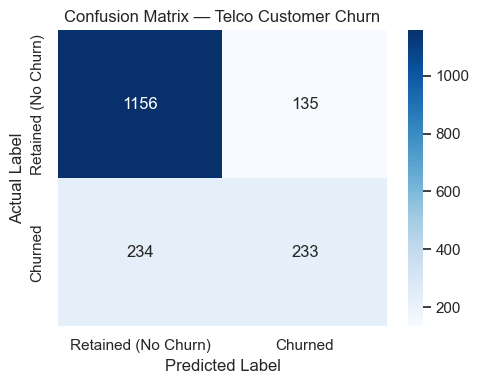

In [10]:
# Week 6 — Cell 10: Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Retained (No Churn)', 'Churned'],
    yticklabels=['Retained (No Churn)', 'Churned']
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix — Telco Customer Churn")
plt.tight_layout()
plt.show()


# Classification Report

In [11]:
# Week 6 — Cell 11: Classification Report

report = classification_report(
    y_test,
    y_pred,
    target_names=['Retained (No Churn)', 'Churned']
)

print("Classification Report:")
print(report)


Classification Report:
                     precision    recall  f1-score   support

Retained (No Churn)       0.83      0.90      0.86      1291
            Churned       0.63      0.50      0.56       467

           accuracy                           0.79      1758
          macro avg       0.73      0.70      0.71      1758
       weighted avg       0.78      0.79      0.78      1758

